통계: 데이터를 이해하는 바탕이 되는 수리적 기법

5.1 데이터셋 설명
데이터를 설명하기 위한 방법으로,
 가장 간단한 방법 : 데이터 자체를 보여주는 것

In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

데이터의 수가 적다면 데이터 자체를 보여주는 것이 가장 좋은 방법일 수 있음.

그러나, 데이터가 많다면, 데이터를 다루기도 불편할 뿐더러 이해하기 힘듦.

이럴 때, 통계를 사용하면, 데이터를 정제하여 중요 정보만을 전달할 수 있다.

In [8]:
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# 벡터 내적
def dot(v, w):
    # v_1 * w_1 + ... + v_n * w_n
    return sum(v_i*w_i for v_i,w_i in zip(v,w))

# 내적의 개념을 사용한, 각 성분의 제곱 합
def sum_of_squares(v):
    # v_1 * v_1 + ... + v_n*v_n
    return dot(v,v)

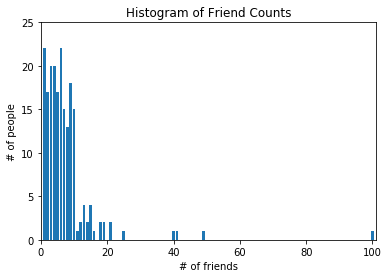

In [9]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

하지만 히스토그램을 설명하는 것은 다소 어려울 수 있음.

그렇기 떄문에, 히스토그램에 대한 통계치를 계산하면 설명에 도움이 된다

In [10]:
# 전체 갯수
num_points = len(num_friends) # 204

# 최대, 최소
largest_value = max(num_friends) # 100
smallest_value = min(num_friends) # 1

# 정렬된 list의 특정위치에 있는 값을 구할수도 있다.
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2]# 49

5.1.1 중심 경향성

중심경향성(central tendency) : 데이터의 중심이 어디에 있는지 나타나는 지표

대부분의 경우, 데이터의 값을 데이터 포인트의 개수로 나눈 평균(average)을 사용

In [11]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [12]:
# Numpy version
np.mean(num_friends)

7.333333333333333

중앙값(median)

중앙값은 데이터의 가장 중앙에 있는 데이터 포인트. 짝수일 경우, 중앙에 있는 두 데이터의 평균

평균과 달리 중앙값은 데이터 모든 값의 영향 x

데이터의 중앙에 있는 값(홀수) 또는 중앙에 있는 두 값의 평균(짝수)

In [14]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    
    if n % 2 == 1:
        # 데이터 포인터의 개수가 홀수면, 중앙값을 반환
        return sorted_v[midpoint]
    else:
        # 데이터 포인터의 개수가 짝수면, 두 값의 평균을 반환
        lo = midpoint -1
        hi = midpoint +1
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

In [15]:
# Numpy version
np.median(num_friends)

6.0

평균은 데이터가 바뀌어도 값의 변화가 부드럽다. 

만약 n개의 데이터 포인터가 주어질 때, 데이터 포인터 한 개의 값이 작은 수 e만큼 증가한다면,

평균은 e/n만큼 증가.

반면, 중앙값의 경우 정렬이 필요.

만약 데이터 포인터 한 개의 값이 작은 수 e만큼 증가한다면, 중앙값은 e만큼 증가 할 수도, 작은값만큼 증가할 수도 있다. 심지어 주어진 데이터에 따라 중앙값이 변하지 않을 수도 있다.

하지만, 평균은 이상치에 매우 민감하다.

가령 네트워트에서 친구가 가장 많은 사용자가 100명대신 200명의 친구를 가지고 있을 때, 평균은 7.82만큼 증가하지만, 중앙값은 변치 않는다.

이상치가 "나쁜" 데이터라면, 평균은 데이터에 대한 잘못된 정보를 줄 수 있음.

분위(quantile)
분위는 중앙값을 포괄하는 개념.

데이터의 특정 백분위보다 낮은 값을 의미

중앙값은 상위 50%의 데이터보다 작은 값을 의미

In [19]:
def quantile(x, p):
    # x의 p분위에 속하는 값을 반환
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.10) # 1
quantile(num_friends, 0.25) # 3
quantile(num_friends, 0.50) # 6
quantile(num_friends, 0.75) # 9
quantile(num_friends, 0.90) # 13

# for문 이용
for i in range(0, 100, 25):
    print("%.2f Percentage value" %(i*0.01), quantile(num_friends, i * 0.01))

0.00 Percentage value 1
0.25 Percentage value 3
0.50 Percentage value 6
0.75 Percentage value 9


In [20]:
np.percentile(num_friends, [i for i in range(0,100,25)])

array([1., 3., 6., 9.])

최빈값(Mode)
최빈값 : 데이터에서 가장 자주 나오는 값

In [23]:
def mode(x):
    # 최빈값이 하나 보다 많으면 list를 반환
    counts = Counter(x)
    max_count = max(counts.values())
    
    return [x_i for x_i, count in counts.items()
           if count == max_count]

mode(num_friends) # 6, 1

[6, 1]

In [27]:
# most_common() in Counter Version
cnt = Counter(num_friends)
cnt.most_common(2) # 최빈값 두개

[(6, 22), (1, 22)]

5.1.2 산포도(dispersion)

데이터가 얼마나 퍼져있는지의 정도.

보통 0과 근접한 값일 경우, 데이터가 거의 퍼져 있지 않다는 의미이며, 

큰 값이면 매우 퍼져 있다는 것을 의미.

In [28]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [29]:
# Numpy Version
np.max(num_friends) - np.min(num_friends)

99

범위는 max와 min이 같은경우만 0이 됨. 이 경우, x의 데이터 포인터는 모두 동일한 값을 가지고 있으며, 또한 데이터가 퍼져있지 않음을 의미.

반대로 범위의 값이 크다면, max가 min에 비해 훨씬 크다는 것을 의미하며, 데이터가 퍼져있다는 것을 의미.

범위 또한 중앙값처럼 데이터 전체에 의존 x.

(0 혹은 100), (0, 100 그리고 수많은 50) 모두 동일한 범위를 가짐

하지만 0 혹은 100으로 구성된 데이터가 더 퍼져 있다는 느낌이 듦.

분산(variance)

분산은 산포도를 측정하는 약간 더 복잡한 개념

In [30]:
def de_mean(x):
    # x의 모든 데이터 포인트에서 평균을 뺌 (평균을 0으로 만들기 위해)
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    # x에 두 개 이상의 데이터가 있다고 가정
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

81.54351395730707

In [31]:
# Numpy Version
np.var(num_friends)

81.14379084967321

In [32]:
# 속도 비교
%timeit np.var(num_friends)
%timeit variance(num_friends) # 일반적인 분산 연산도 numpy가 빠름

66 µs ± 4.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
194 µs ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


표준편차(standard deviation)

데이터 포인트의 단위가 무엇이든 간에 중심 경향성은 같은 단위를 가진다.

범위 또한 동일한 단위이다.

하지만! 분산의 단위는 기존 단위의 제곱이다.

그렇기 때문에 분산 대신 원래 단위와 같은 표준 편차를 이용할 때가 많다

In [33]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.030144736232474

In [34]:
# Numpy Version
np.std(num_friends, dtype = np.float64)

9.007984838446012

범위와 표준편차 또한 평균같이 이상치에 민감하게 반응하는 문제가 있음.

예를 들어, 친구 수가 가장 많은 사용가자 200명의 친구가 있다면 표준편차는 60%나 증가한 14.89가 된다.

더 안정적인 방법으로써 상위 25%에 해당하는 값과 하위 25%에 해당하는 값의 차이를 계산한다.

In [36]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

5.2 상관관계(Correlation)

두 변인 간의 관계를 측정하고 묘사하기 위한 통계학적 기법

즉, 두 list의 관계를 살펴보는 것

공분산(covariance)

분산과 비슷한 개념인 공분산부터 살펴봐야 함.

분산은 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산.

공분산은 두 변수가 각각의 평균에서 얼마나 얼미 떨어져 있는지 계산.

In [37]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [38]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

covariance(num_friends, daily_minutes)

22.425435139573075

In [39]:
# Numpy Version
np.cov(num_friends, daily_minutes)

array([[ 81.54351396,  22.42543514],
       [ 22.42543514, 100.78589895]])

만약 x와 y 모두 각각의 평균보다 크거나 작을 경우, 양수가 더해짐.

반면, 둘 중 하나는 평균보다 크고 다른 하나는 평균보다 작을 경우, 음수가 더해짐.

공분산이 양수면 x의 값이 클수록 y의 값이 크고, x의 값이 작을 수록 y도 작다는 의미.

반대로 공분산이 음수면 x값이 클수록 y값 작고, x값이 작을수록 y값 크다는 의미.

공분산이 0이면 그와 같은 관계가 존재 x

하지만, 공분산의 단위는 이해하기 쉽지 x

그래서 공분산에서 각각의 표준편차를 나눠 준 상관관계를 살펴본다.

In [40]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0 # 편차가 존재하지 않는다면 상관관계는 0이다.

correlation(num_friends, daily_minutes)

0.24736957366478235

In [43]:
# Numpy Version
np.corrcoef(num_friends, daily_minutes)

array([[1.        , 0.24736957],
       [0.24736957, 1.        ]])

상관관계는 단위가 없다.

항상 -1(완벽한 음의 상관관계) 에서 1(완벽한 양의 상관관계) 사이의 값을 가진다.

e.g. 상관관계가 0.25라면 상대적으로 약한 양의 상관관계

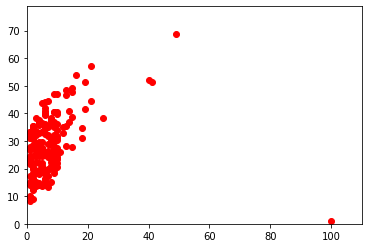

In [42]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0,max(num_friends)+10,0,max(daily_minutes) +10 ])
plt.show()

100명의 친구가 있지만 하루에 1분만 사이트를 이용하는 사용자는 확실히 이상치이며, 

상관관계에 큰 영향을 준다. 만약, 이 사용자(이상치)를 제외한다면?

In [47]:
outlier = num_friends.index(100)
num_friends_good = [x
                   for i,x in enumerate(num_friends)
                   if i != outlier]

daily_minutes_good = [x
                     for i,x in enumerate(daily_minutes)
                     if i != outlier]

correlation(num_friends_good, daily_friends_good)

0.5736792115665601

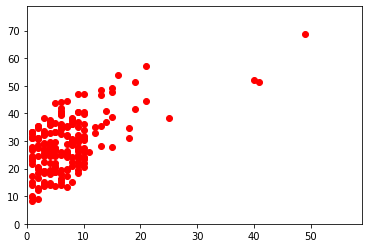

In [49]:
plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0,max(num_friends_good)+10,0,max(daily_minutes_good) +10 ])
plt.show()

이상치 제거 후 더 강력한 상관관계를 나타냄

5.3 심슨의 역설(Simpsons's paradox)

데이터 분석을 하다보면 혼재변수(confounding variables)가 누락되어 상관관계가 잘못계산되는 경우를 일컷는다.

상관관계는 다른 모든 것이 동일할때 두 변수의 관계를 나타낸다.

만약 실험을 잘 설계해서 데이터의 레이블을 무작위로 설정했다면, "다른 모든것이 동일"하다는 가정이 맞아떨어진다.

하지만, 만약 데이터의 레이블에 어떠한 패턴이 존재한다면 "다른 모든것이 동일"하다는 가정이 성립되지 않을 것이다.

이 문제르 피하는 유일한 방법은 데이터를 이해하고 변수에 영향을 주는 모든 요인을 확인하는 것.

5.4 상관관계에 대한 추가 경고 사항

상관관계가 0이라는 것은 두 변 사이에 선형적인 관계가 없다는 것을 의미하지만,

다른 종류의 관계가 존재할 수도 있다.

In [51]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
correlation(x,y)

0.0

위의 경우, x와 y의 상관관계는 0이다.

하지만, 분명히 y는 x의 절대값이라는 관계를 가지고 있다!

이러한 관계는 x_i와 mean(x)의 관계가 어떻게 y_i와 mean(y)의 관계에 영향을 주는지 살피는 방식(즉, 상관관계로 연관성을 살피는 방식)으로만 설명x

또한, 상관관계는 연관성이 얼마나 크고 작은지 설명x

In [53]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
correlation(x,y)

1.0

위 두 관계는 완벽하게 연관되어 있다.

하지만 (무엇을 측정하느냐에 다르지만) 이 관계는 문제를 분석하는데 무의미 할 수도 있다.

5.5 상관관계와 인과관계

"상관관계는 인과관계를 의미하지 않는다(corrlation is not causation)"

만약 x와 y가 강한 상관관계를 보인다면 x가 y를 발생시켰다고 볼 수도 있고, y가 x를 발생시켰다고 볼 수도 있다.

혹은 서로가 서로를 동시에 발생시키거나, 다른 외부 요인이 발생시키거나 아무런 인과관계가 없을 수도 있다.

인과관계를 확인해보는 방법중에 데이터 포인트를 무작위로 선택해서 확인하는 방법이 있다.

사용자를 비슷한 조건과 성질의 두 그룹으로 나누고 한 그룹에만 다른 요인을 적용해 본다면, 해당 요인과 결과의 인과관계를 확인해 볼 수 있다. 

Reference :
밑바닥부터 시작하는 데이터과학 5장,
https://github.com/newhiwoong/DATA_SCIENCE_FROM_SCRATCH/blob/master/data-science-from-scratch-master/notebook/ch05_statistics.ipynb